In [1]:
import pandas as pd
import numpy as np

In [4]:
# f-String
name = 'Hassan'
age = 28
print('My name is:', name, 'and my age is:', age, 'years old')

My name is: Hassan and my age is: 28 years old


In [6]:
# f-String
name = 'Hassan'
age = 28
print(f'My name is {name}, and my age is {age} years old')

My name is Hassan, and my age is 28 years old


In [7]:
# List of cities
cities = ["Mashhad", "Shiraz", "Tehran", "Tabriz", "Isfahan"]

In [11]:
np.random.seed(42)
print(np.random.rand(3))

[0.37454012 0.95071431 0.73199394]


In [ ]:
# --- Step 2: Function to generate synthetic weather data ---
def generate_weather_data(city):
    days = np.arange(1, 366)  # Generates numbers 1 to 365, representing day of the year, as X values
    
    # Base climate settings (rough estimates for different cities)
    base_settings = {
        "Mashhad": {"tmax": 25, "tmin": 10, "rain": 1.5, "hum": 55, "rad": 18},
        "Shiraz":  {"tmax": 28, "tmin": 12, "rain": 1.2, "hum": 50, "rad": 20},
        "Tehran":  {"tmax": 30, "tmin": 15, "rain": 1.0, "hum": 45, "rad": 22},
        "Tabriz":  {"tmax": 22, "tmin": 8,  "rain": 1.8, "hum": 60, "rad": 17},
        "Isfahan": {"tmax": 29, "tmin": 13, "rain": 0.8, "hum": 40, "rad": 23},
    }
    
    base = base_settings[city]

    # np.random.seed(...), hen you use the same seed, you get 
    # the same sequence of “random” numbers every time.

    # EXAMPLE: np.random.seed(42)       print(np.random.rand(3))
    #hash() takes an object (for example, a string like "Tehran") and returns an integer
    # print(hash("Tehran"))
    np.random.seed(hash(city) % 2**32)
    
    # --- Synthetic data generation ---
    tmax = base["tmax"] + 10 * np.sin(2 * np.pi * days / 365) + np.random.normal(0, 2, size=365)
    #base["tmax"], This is the average maximum temperature for that city
    #10 * np.sin(2 * np.pi * days / 365)--->days → [1, 2, 3, ..., 365]
    #2 * np.pi * days / 365 → converts days into angles (0 to 2π over the year)
    #np.sin(...) → produces a smooth sine wave that repeats every year → values go 
    # from -1 (coldest) to +1 (warmest)
    #So the temperature oscillates ±10 °C around the baseline.
    #np.random.normal(0, 2, size=365), adds random noise to make the data look realistic

    tmin = base["tmin"] + 8 * np.sin(2 * np.pi * (days - 30) / 365) + np.random.normal(0, 2, size=365)


    rainfall = np.maximum(0, np.random.normal(base["rain"], 1.0, size=365)) * (np.random.rand(365) < 0.3)
    #np.random.normal(base["rain"], 1.0, size=365), Generates 365 random values 
    # from a normal (Gaussian) distribution
    #np.maximum(0, ...) --> Ensures rainfall cannot be negative.
    #(np.random.rand(365) < 0.3), np.random.rand(365) generates 365 random numbers between 0 and 1.
    #omparing with < 0.3 gives a Boolean array (True/False) — roughly 30% True, 70% False.


    humidity = np.clip(base["hum"] + np.random.normal(0, 10, size=365), 20, 100)
    radiation = np.clip(base["rad"] + np.random.normal(0, 2, size=365) - 4 * np.cos(2 * np.pi * days / 365), 5, 25)
    

    # --- Build DataFrame ---
    df = pd.DataFrame({
        "day_of_year": days,
        "tmax": np.round(tmax, 1),
        "tmin": np.round(tmin, 1),
        "rainfall": np.round(rainfall, 2),
        "humidity": np.round(humidity, 1),
        "radiation": np.round(radiation, 2),
    })
    
    return df



In [ ]:
for city in cities:
    df = generate_weather_data(city)
    df.to_csv(f"{city}.csv", index=False) #By default, .to_csv(),  
    #writes the index as the first column in the CSV, donot write index=False
    print(f"✅ Saved {city}.csv with {len(df)} rows") 

print("\nAll files generated successfully!")

✅ Saved Mashhad.csv with 365 rows
✅ Saved Shiraz.csv with 365 rows
✅ Saved Tehran.csv with 365 rows
✅ Saved Tabriz.csv with 365 rows
✅ Saved Isfahan.csv with 365 rows

All files generated successfully!


In [21]:
tmin_means = {}

# Step 1: Read each CSV and compute average Tmin
for city in cities:
    df = pd.read_csv(f"{city}.csv")
    avg_tmin = df["tmin"].mean()
    tmin_means[city] = avg_tmin
    print(f"{city}: Average Tmin = {avg_tmin:.2f} °C")


Mashhad: Average Tmin = 9.92 °C
Shiraz: Average Tmin = 12.14 °C
Tehran: Average Tmin = 15.05 °C
Tabriz: Average Tmin = 8.16 °C
Isfahan: Average Tmin = 12.82 °C


In [22]:
# sorted()
# After sorting, sorted_tmin looks like:[("Tehran",16.5), ("Isfahan",15.1), ("Shiraz",14.2), ("Mashhad",12.3)]
sorted_tmin = sorted(tmin_means.items(), key=lambda x: x[1], reverse=True)
highest_two = sorted_tmin[:2]
lowest_one = sorted_tmin[-1]

print(f"Highest Tmin Cities: {highest_two[0][0]} ({highest_two[0][1]:.2f}°C) and {highest_two[1][0]} ({highest_two[1][1]:.2f}°C)")
print(f"Lowest Tmin City: {lowest_one[0]} ({lowest_one[1]:.2f}°C)")

Highest Tmin Cities: Tehran (15.05°C) and Isfahan (12.82°C)
Lowest Tmin City: Tabriz (8.16°C)


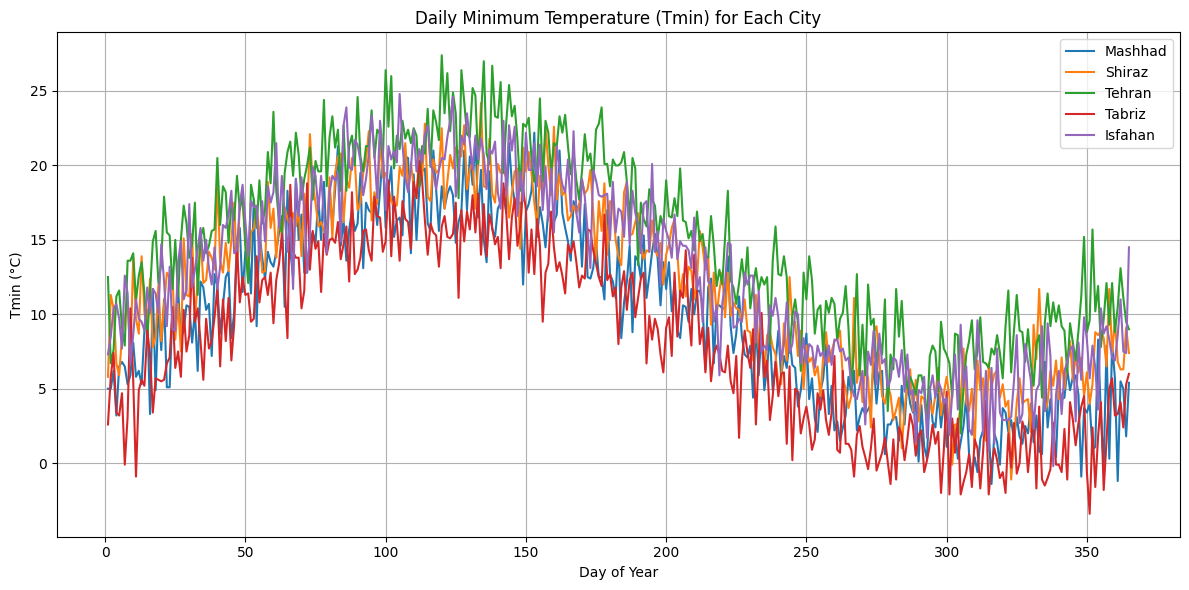

In [23]:
import matplotlib.pyplot as plt

# Initialize plot
plt.figure(figsize=(12, 6))

# Loop through cities and plot Tmin
for city in cities:
    df = pd.read_csv(f"{city}.csv")
    plt.plot(df["day_of_year"], df["tmin"], label=city)

# Customize plot
plt.title("Daily Minimum Temperature (Tmin) for Each City")
plt.xlabel("Day of Year")
plt.ylabel("Tmin (°C)")
plt.legend()  # Shows city names
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [25]:
subset =  df[(df['day_of_year']>=100) & (df['day_of_year']<=200)]
subset.tail()

,day_of_year,tmax,tmin,rainfall,humidity,radiation
195,196,26.7,14.2,0.00,33.5,25.00
196,197,25.2,15.6,0.00,30.1,25.00
197,198,24.8,12.0,0.95,38.9,25.00
198,199,26.3,16.4,0.00,39.2,25.00
199,200,26.5,15.6,0.00,38.2,24.98


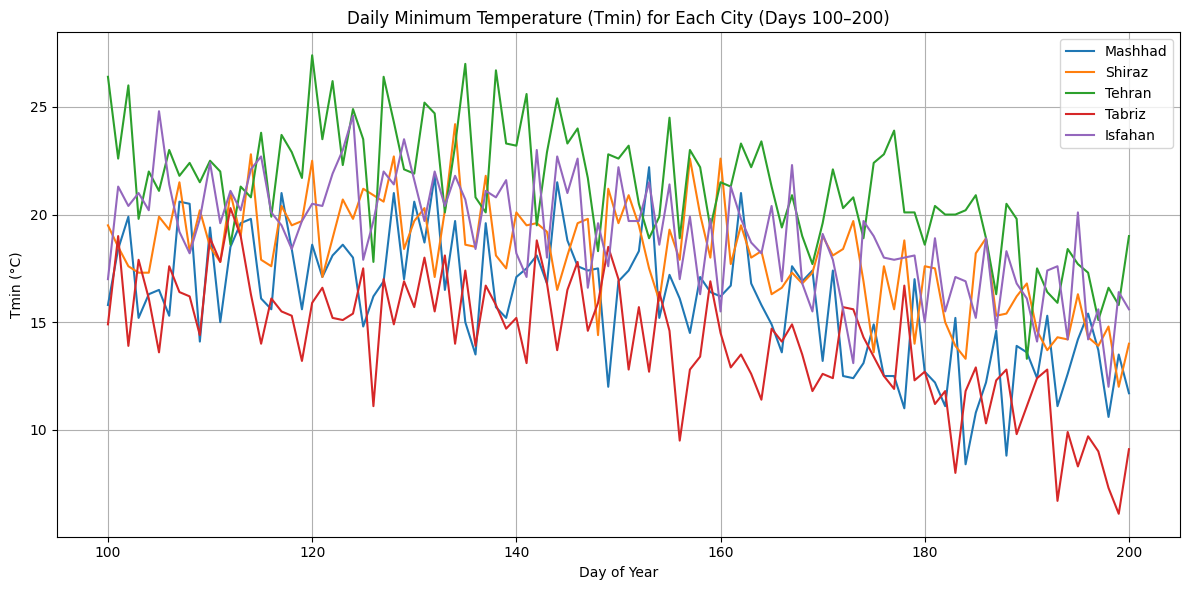

In [26]:
plt.figure(figsize=(12, 6))

# Loop through cities and plot Tmin for days 100–200
for city in cities:
    df = pd.read_csv(f"{city}.csv")
    subset = df[(df["day_of_year"] >= 100) & (df["day_of_year"] <= 200)]
    plt.plot(subset["day_of_year"], subset["tmin"], label=city)

# Customize plot
plt.title("Daily Minimum Temperature (Tmin) for Each City (Days 100–200)")
plt.xlabel("Day of Year")
plt.ylabel("Tmin (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

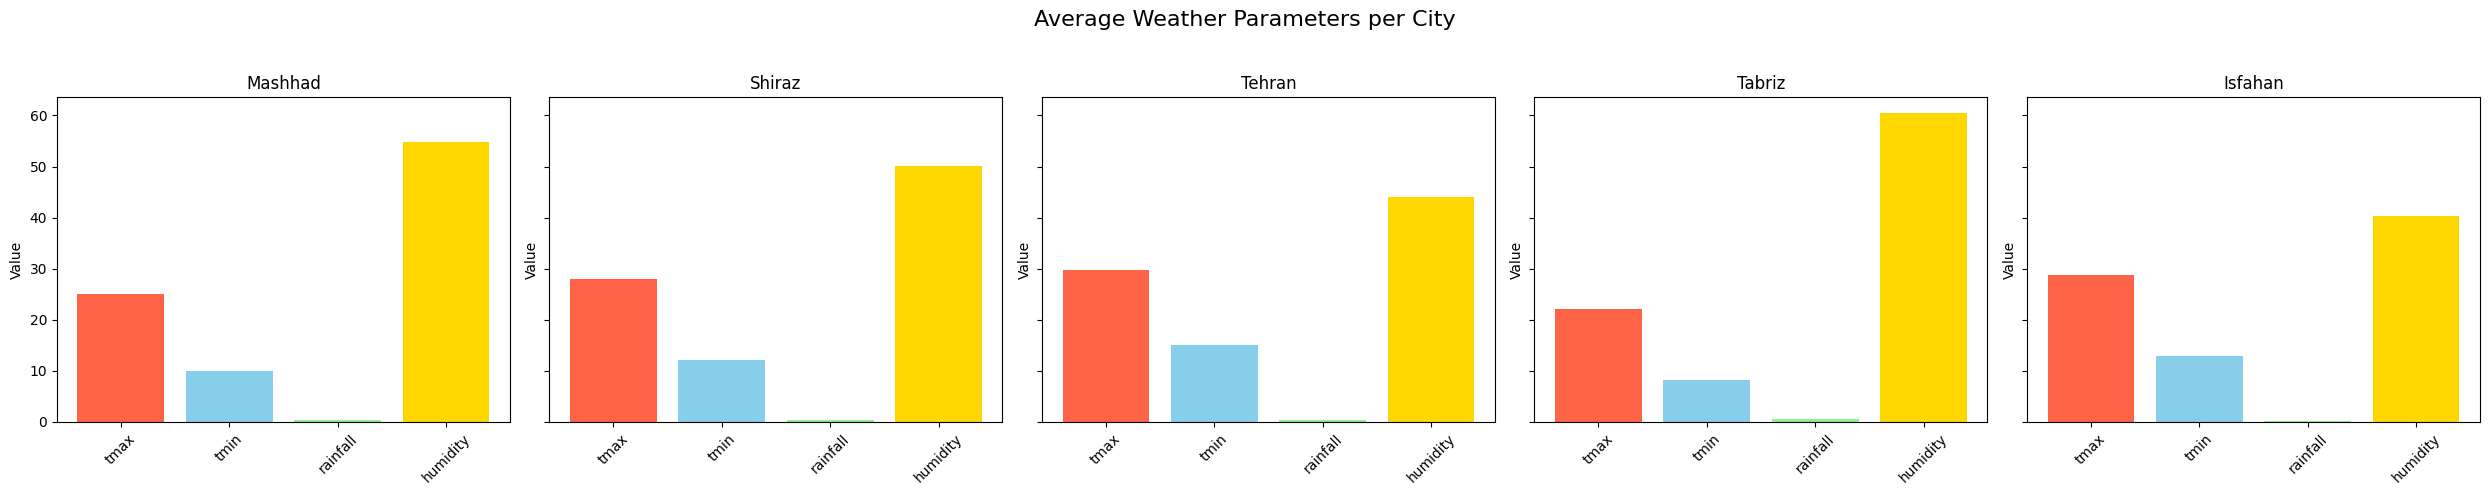

In [29]:
variables = ["tmax", "tmin", "rainfall", "humidity"]
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
for ax, city in zip(axes, cities): # ---> (ax1, "Tehran"), (ax2, "Mashhad"), ...
    df = pd.read_csv(f"{city}.csv")
    
    # Compute yearly average for each variable
    averages = [df[var].mean() for var in variables]
    
    # Bar chart
    ax.bar(variables, averages, color=['tomato', 'skyblue', 'lightgreen', 'gold'])
    # variables labels teh x axis, avrages: Height of each bar
    ax.set_title(city)
    ax.set_ylabel("Value")
    ax.set_xticklabels(variables, rotation=45)

# Add main title
fig.suptitle("Average Weather Parameters per City", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # ---> rect=[left, bottom, right, top ]
plt.show()

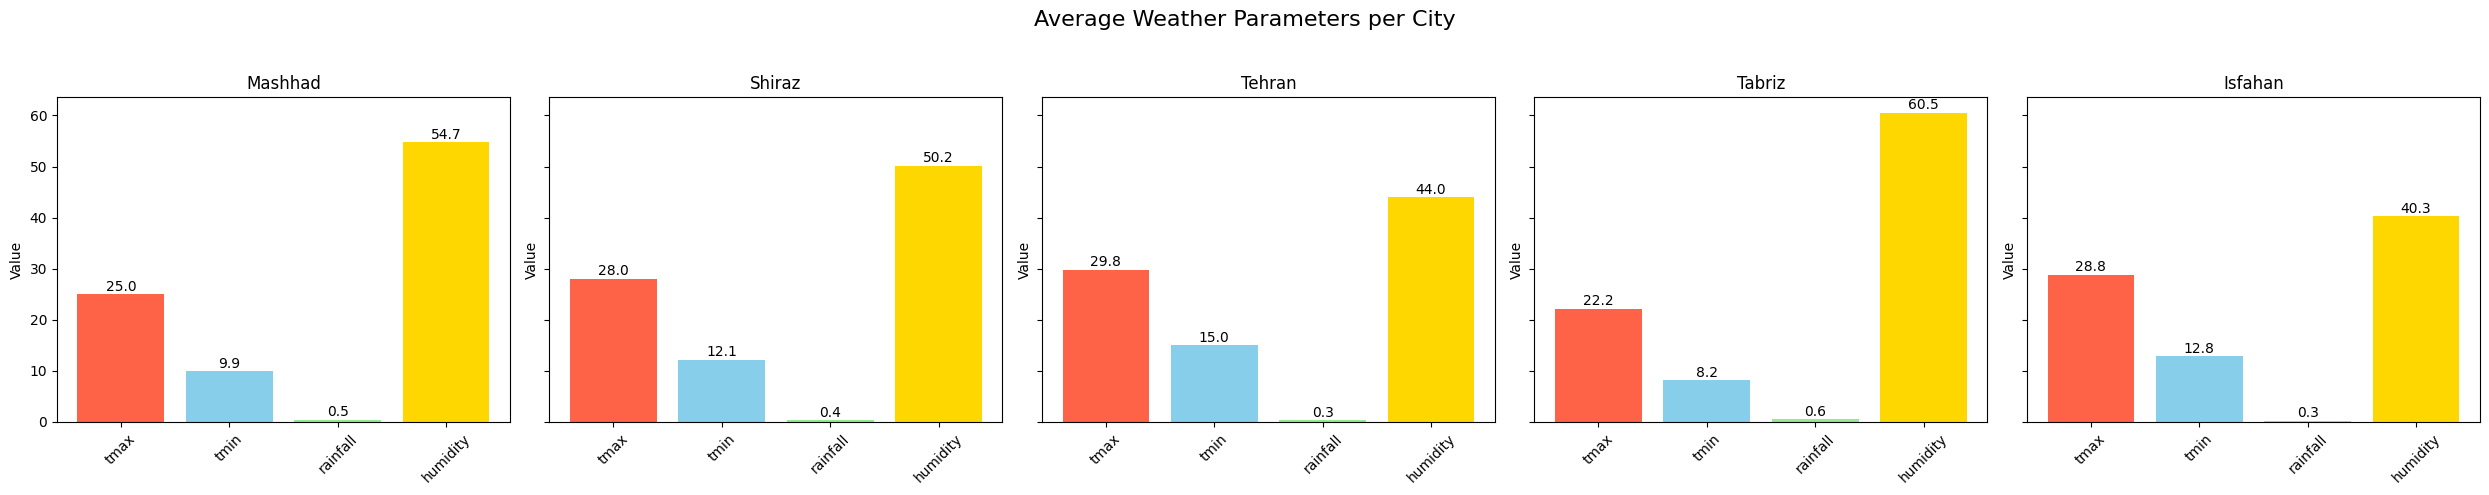

In [30]:
variables = ["tmax", "tmin", "rainfall", "humidity"]
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
for ax, city in zip(axes, cities): # ---> (ax1, "Tehran"), (ax2, "Mashhad"), ...
    df = pd.read_csv(f"{city}.csv")
    
    # Compute yearly average for each variable
    averages = [df[var].mean() for var in variables]
    
    # Bar chart
    bars = ax.bar(variables, averages, color=['tomato', 'skyblue', 'lightgreen', 'gold'])
    # variables labels teh x axis, avrages: Height of each bar
    ax.set_title(city)
    ax.set_ylabel("Value")
    ax.set_xticklabels(variables, rotation=45)
    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.1f}", ha='center', va='bottom')

# Add main title
fig.suptitle("Average Weather Parameters per City", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # ---> rect=[left, bottom, right, top ]
plt.show()

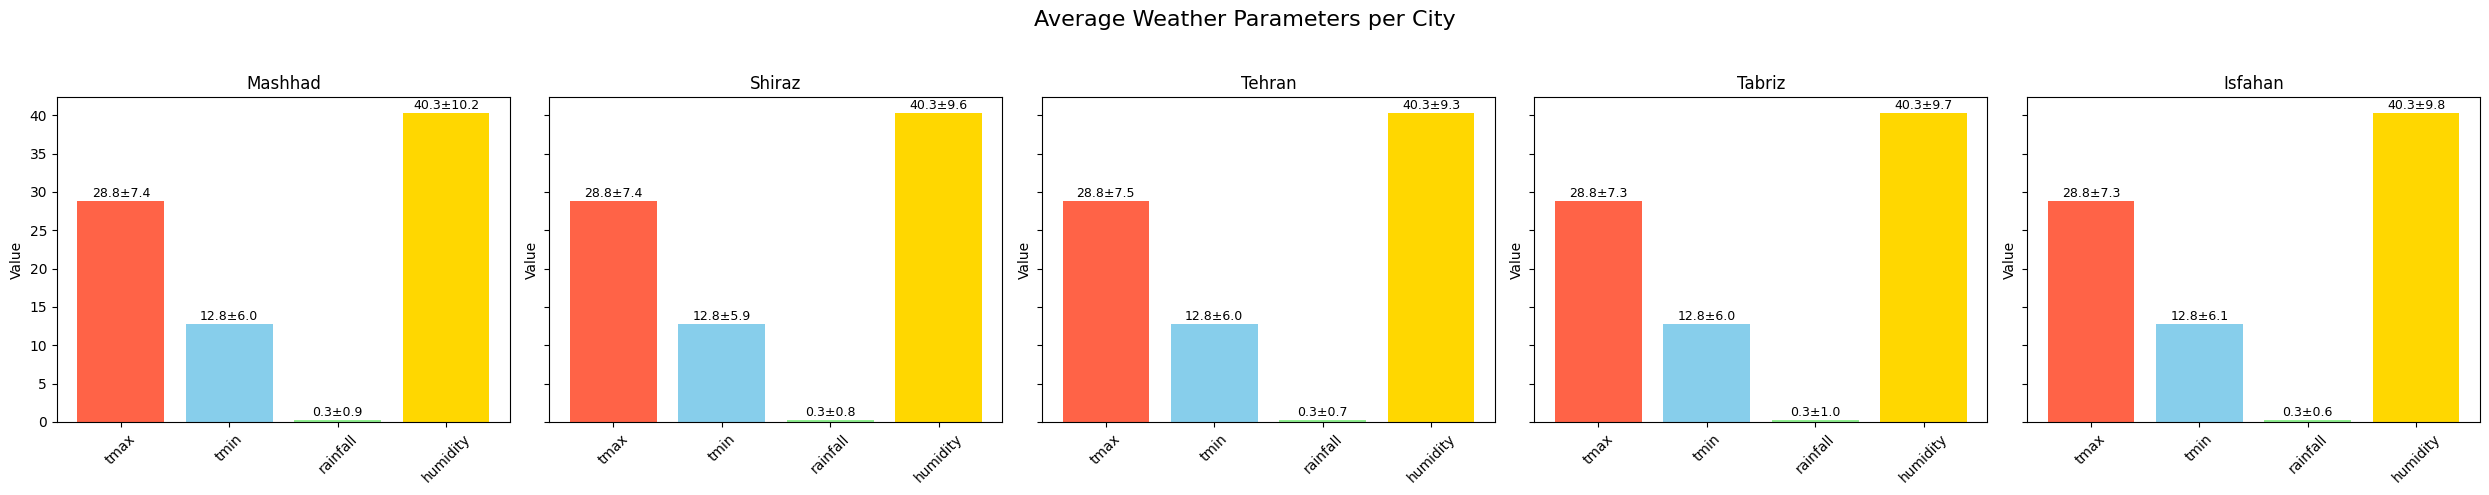

In [34]:
variables = ["tmax", "tmin", "rainfall", "humidity"]
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
for ax, city in zip(axes, cities): # ---> (ax1, "Tehran"), (ax2, "Mashhad"), ...
    df = pd.read_csv(f"{city}.csv")
    
    # Compute yearly average for each variable
    means = [df[var].mean() for var in variables]
    stds = [df[var].std() for var in variables]
    
    # Bar chart
    bars = ax.bar(variables, averages, color=['tomato', 'skyblue', 'lightgreen', 'gold'])
    # variables labels teh x axis, avrages: Height of each bar
    ax.set_title(city)
    ax.set_ylabel("Value")
    ax.set_xticklabels(variables, rotation=45)
    # Add values on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.1,
            f"{height:.1f}±{stds[i]:.1f}",
            ha='center', va='bottom', fontsize=9
        )
# Add main title
fig.suptitle("Average Weather Parameters per City", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # ---> rect=[left, bottom, right, top ]
plt.show()

In [28]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")